# Module 4 : Outlier detection process

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n
#read the given dataset
df = p.read_csv("df.csv")

In [2]:
df.rename(columns={'Mean Temp':'T'}, inplace=True)
df.rename(columns={'Average Humidity':'H'}, inplace=True)
df.rename(columns={'rainfall':'R'}, inplace=True)
df.rename(columns={'Cost of Cultivation (`/Hectare) C2':'CC'}, inplace=True)
df.rename(columns={'Cost of Production (`/Quintal) C2':'CP'}, inplace=True)
df.rename(columns={'Yield (Quintal/ Hectare) ':'Y'}, inplace=True)
df.rename(columns={'cost of production per yield':'CPPY'}, inplace=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Y','CPPY']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)


In [4]:
df['YPr']= df.Y.map({'13':0, '7':0, '11':0, '4':0, '23':0, '39':1, '10':0, '18':0, '36':1, '47':1, '8':0, '3':0,
       '38':1, '46':1, '5':0, '9':0, '2':0, '44':1, '17':0, '41':1, '6':0, '16':0, '35':1, '19':0,
       '0':0, '43':1, '12':0, '45':1, '25':0, '33':1, '29':0, '37':1, '32':1, '21':0, '42':1,
       '48':1, '30':1, '34':1, '26':0, '20':0, '31':1, '24':0, '27':0, '22':0, '40':1, '28':0,
       '1':0, '14':0, '15':0})

df['CPPYPr']= df.CPPY.map({'126':0, '72':0, '200':0, '78':0, '144':0, '212':0, '149':0, '151':0, '178':0, '312':0,
       '187':0, '69':0, '205':0, '276':1, '76':0, '134':0, '66':0, '254':1, '150':0, '291':1,
       '155':0, '106':0, '87':0, '119':0, '183':0, '170':0, '28':0, '265':1, '180':0, '36':0,
       '293':1, '326':1, '148':0, '234':1, '3':0, '124':0, '111':0, '182':0, '166':0, '169':0,
       '270':1, '243':1, '98':0, '230':0, '282':1, '334':1, '188':0, '65':0, '34':0, '328':1,
       '160':0, '115':0, '89':0, '152':0, '240':1, '141':0, '233':1, '32':0, '281':1, '335':1,
       '109':0, '47':0, '136':0, '112':0, '261':1, '229':0, '42':0, '325':1, '213':0, '175':0,
       '125':0, '196':0, '292':1, '82':0, '235':1, '79':0, '105':0, '123':0, '210':0, '39':0,
       '146':0, '185':0, '201':0, '41':0, '164':0, '184':0, '222':0, '250':0, '301':1,
       '218':0, '217':0, '168':0, '264':1, '46':0, '103':0, '284':1, '198':0, '56':0, '171':0,
       '331':1, '256':1, '99':0, '58':0, '247':1, '286':1, '67':0, '133':0, '143':0, '204':0,
       '227':0, '194':0, '6':0, '280':1, '225':0, '48':0, '258':1, '94':0, '244':1, '294':1,
       '215':0, '132':0, '277':1, '71':0, '219':0, '315':1, '97':0, '91':0, '156':0, '289':1,
       '100':0, '295':1, '147':0, '214':0, '19':0, '223':0, '90':0, '269':1, '300':1, '114':0,
       '135':0, '173':0, '55':0, '113':0, '127':0, '73':0, '177':0, '274':1, '118':0, '191':0,
       '145':0, '307':1, '162':0, '228':0, '50':0, '5':0, '248':1, '203':0, '61':0, '129':0,
       '192':0, '83':0, '158':0, '206':0, '242':1, '267':1, '137':0, '92':0, '176':0, '298':1,
       '25':0, '296':1, '186':0, '239':1, '193':0, '165':0, '310':1, '20':0, '287':1, '75':0,
       '107':0, '271':1, '138':0, '121':0, '241':1, '74':0, '43':0, '232':0, '154':0, '181':0,
       '195':0, '102':0, '237':1, '110':0, '268':1, '49':0, '104':0, '64':0, '318':1, '13':0,
       '128':0, '153':0, '31':0, '93':0, '309':1, '257':0, '52':0, '262':1, '202':0, '174':0,
       '101':0, '224':0, '86':0, '45':0, '263':1, '167':0, '17':0, '29':0, '30':0, '54':0,
       '303':1, '163':0, '251':1, '142':0, '273':1, '96':0, '35':0, '327':1, '53':0, '15':0,
       '190':0, '308':1, '226':0, '139':0, '62':0, '2':0, '1':0, '27':0, '84':0, '285':1,
       '246':1, '23':0, '189':0, '299':1, '231':0, '24':0, '16':0, '333':1, '306':1, '18':0,
       '288':1, '199':0, '260':1, '323':1, '37':0, '278':1, '324':1, '140':0, '4':0, '245':1,
       '322':1, '329':1, '159':0, '80':0, '197':0, '275':1, '11':0, '40':0, '33':0, '0':0,
       '320':1, '290':1, '68':0, '220':0, '21':0, '330':1, '12':0, '157':0, '302':1, '44':0,
       '221':0, '216':0, '279':1, '63':0, '313':1, '311':1, '332':1, '266':1, '238':1,
       '211':0, '172':0, '14':0, '117':0, '161':0, '122':0, '60':0, '321':1, '95':0, '208':0,
       '272':1, '131':0, '207':0, '81':0, '314':1, '51':0, '283':1, '120':0, '38':0, '9':0,
       '130':0, '70':0, '179':0, '7':0, '10':0, '108':0, '255':1, '77':0, '88':0, '22':0,
       '57':0, '85':0, '304':1, '253':1, '249':0, '297':1, '116':0, '305':1, '317':1, '252':1,
       '236':1, '209':0, '259':1, '26':0, '319':1, '316':1, '59':0, '336':1, '8':0})


In [5]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y', 'CPPY', 'YPr', 'CPPYPr'],
      dtype='object')

In [6]:
df.pivot_table(values='YPr',index = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y'])


YPr
State_Name                  District_Name Crop_Year Season      Crop                    Area    R        H  T  CC       CP      Y      
Andaman and Nicobar Islands NICOBARS      2000      Kharif      Arecanut                1254.0  0.012360 57 62 23076.74 1941.55 13    0
                                                                Other Kharif pulses     2.0     0.004172 57 58 16528.68 2172.46 8     0
                                                                Rice                    102.0   0.000000 56 58 19551.90 1898.30 12    0
                                                    Whole Year  Banana                  176.0   0.031747 62 56 24171.65 3670.54 5     0
                                                                Cashewnut               720.0   0.000000 65 56 25270.26 2775.80 10    0
                                                                Coconut                 18168.0 0.027191 65 58 33116.82 2539.47 19    0
                                                                Dry ginger              36.0    0.026821 61 56 50828.83 2003.76 32    1
                                                                Sugarcane               1.0     0.010284 58 57 44756.72 2509.99 26    0
                                                                Sweet potato            5.0     0.020465 63 60 42070.44 2179.26 27    0
                                                                Tapioca                 40.0    0.060054 62 59 44018.18 2127.35 28    0
                                          2001      Kharif      Arecanut                1254.0  0.084119 56 58 12610.85 1691.66 7     0
                                                                Other Kharif pulses     2.0     0.000000 63 56 16873.17 1551.94 14    0
                                                                Rice                    83.0    0.000000 67 58 21618.43 1882.68 15    0
                                                    Whole Year  Cashewnut               719.0   0.124479 58 60 18679.33 2277.68 9     0
                                                                Coconut                 18190.0 0.074505 59 58 26762.09 1559.04 25    0
                                                                Dry ginger              46.0    0.098584 53 60 17314.20 3484.01 3     0
                                                                Sugarcane               1.0     0.222846 62 60 30434.61 2554.91 17    0
                                                                Sweet potato            11.0    0.128555 59 56 30393.66 2358.00 18    0
                                          2002      Kharif      Rice                    189.2   0.113419 58 54 30114.45 1918.92 21    0
                                                    Whole Year  Arecanut                1258.0  0.080064 58 53 32683.46 3207.35 11    0
                                                                Banana                  213.0   0.077676 66 55 19857.70 404.43  41    1
                                                                Black pepper            63.0    0.094199 71 57 20671.54 581.69  33    1
                                                                Cashewnut               719.0   0.089252 72 53 19810.29 658.77  30    1
                                                                Coconut                 18240.0 0.110557 65 53 21045.11 1387.36 24    0
                                                                Dry chillies            413.0   0.122202 84 55 37801.85 840.58  40    1
                                                                Dry ginger              47.3    0.179694 73 56 8266.98  2614.14 1     0
                                                                Sugarcane               5.0     0.288621 73 60 9165.59  2068.67 2     0
                                          2003      Kharif      Rice                    52.0    0.267170 54 60 7868.64  5777.48 0     0
                                                    

In [7]:
df.pivot_table(values='CPPYPr',index = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y'])


CPPYPr
State_Name                  District_Name Crop_Year Season      Crop                    Area    R        H  T  CC       CP      Y         
Andaman and Nicobar Islands NICOBARS      2000      Kharif      Arecanut                1254.0  0.012360 57 62 23076.74 1941.55 13       0
                                                                Other Kharif pulses     2.0     0.004172 57 58 16528.68 2172.46 8        0
                                                                Rice                    102.0   0.000000 56 58 19551.90 1898.30 12       0
                                                    Whole Year  Banana                  176.0   0.031747 62 56 24171.65 3670.54 5        0
                                                                Cashewnut               720.0   0.000000 65 56 25270.26 2775.80 10       0
                                                                Coconut                 18168.0 0.027191 65 58 33116.82 2539.47 19       0
                                                                Dry ginger              36.0    0.026821 61 56 50828.83 2003.76 32       1
                                                                Sugarcane               1.0     0.010284 58 57 44756.72 2509.99 26       1
                                                                Sweet potato            5.0     0.020465 63 60 42070.44 2179.26 27       1
                                                                Tapioca                 40.0    0.060054 62 59 44018.18 2127.35 28       1
                                          2001      Kharif      Arecanut                1254.0  0.084119 56 58 12610.85 1691.66 7        0
                                                                Other Kharif pulses     2.0     0.000000 63 56 16873.17 1551.94 14       0
                                                                Rice                    83.0    0.000000 67 58 21618.43 1882.68 15       0
                                                    Whole Year  Cashewnut               719.0   0.124479 58 60 18679.33 2277.68 9        0
                                                                Coconut                 18190.0 0.074505 59 58 26762.09 1559.04 25       0
                                                                Dry ginger              46.0    0.098584 53 60 17314.20 3484.01 3        0
                                                                Sugarcane               1.0     0.222846 62 60 30434.61 2554.91 17       0
                                                                Sweet potato            11.0    0.128555 59 56 30393.66 2358.00 18       0
                                          2002      Kharif      Rice                    189.2   0.113419 58 54 30114.45 1918.92 21       0
                                                    Whole Year  Arecanut                1258.0  0.080064 58 53 32683.46 3207.35 11       0
                                                                Banana                  213.0   0.077676 66 55 19857.70 404.43  41       0
                                                                Black pepper            63.0    0.094199 71 57 20671.54 581.69  33       0
                                                                Cashewnut               719.0   0.089252 72 53 19810.29 658.77  30       0
                                                                Coconut                 18240.0 0.110557 65 53 21045.11 1387.36 24       0
                                                                Dry chillies            413.0   0.122202 84 55 37801.85 840.58  40       0
                                                                Dry ginger              47.3    0.179694 73 56 8266.98  2614.14 1        0
                                                                Sugarcane               5.0     0.288621 73 60 9165.59  2068.67 2        0
                                          2003      Kharif      Rice                    52.0    0.267

In [8]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand'], dtype=object)

In [9]:
TN = df[df.State_Name.str.contains('Tamil Nadu')]
TN.Crop.nunique()

87

In [10]:
TN.Crop.unique()

array(['Apple', 'Arecanut', 'Arhar/Tur', 'Ash Gourd', 'Bajra', 'Banana',
       'Beans & Mutter(Vegetable)', 'Beet Root', 'Ber', 'Bhindi',
       'Bitter Gourd', 'Black pepper', 'Bottle Gourd', 'Brinjal',
       'Cabbage', 'Cardamom', 'Carrot', 'Cashewnut', 'Castor seed',
       'Cauliflower', 'Citrus Fruit', 'Coconut ', 'Coriander',
       'Cotton(lint)', 'Cucumber', 'Drum Stick', 'Dry chillies',
       'Dry ginger', 'Garlic', 'Gram', 'Grapes', 'Groundnut', 'Guar seed',
       'Horse-gram', 'Jack Fruit', 'Jowar', 'Jute', 'Korra', 'Lab-Lab',
       'Litchi', 'Maize', 'Mango', 'Mesta', 'Moong(Green Gram)',
       'Niger seed', 'Onion', 'Orange', 'Other Cereals & Millets',
       'Other Citrus Fruit', 'Other Fresh Fruits', 'Other Kharif pulses',
       'Other Vegetables', 'Papaya', 'Peach', 'Pear', 'Pineapple',
       'Plums', 'Pome Fruit', 'Pome Granet', 'Potato', 'Pulses total',
       'Pump Kin', 'Ragi', 'Rapeseed &Mustard', 'Redish', 'Ribed Guard',
       'Rice', 'Samai', 'Sannhamp',

In [11]:
TN.pivot_table(values='CPPYPr',index = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y'])


CPPYPr
State_Name District_Name Crop_Year Season      Crop              Area    R        H  T  CC       CP      Y         
Tamil Nadu ARIYALUR      2008      Kharif      Rice              24574.0 0.029792 51 56 28144.50 3484.01 28       1
                                   Whole Year  Arhar/Tur         209.0   0.062154 59 56 25909.05 2554.91 7        0
                                               Bajra             565.0   0.079640 65 60 33046.12 2358.00 14       0
                                               Banana            190.0   0.115369 65 59 45291.24 1918.92 15       0
                                               Cashewnut         31113.0 0.132526 63 58 46450.20 3207.35 9        0
                                               Castor seed       27.0    0.085930 55 56 17705.93 404.43  25       0
                                               Coconut           335.0   0.044046 49 56 19259.84 581.69  3        0
                                               Coriander         460.0   0.000000 48 58 22560.30 658.77  17       0
                                               Cotton(lint)      3566.0  0.000000 48 61 19083.55 1387.36 18       0
                                               Dry chillies      1774.0  0.023605 46 62 27507.54 840.58  21       0
                                               Groundnut         14528.0 0.007976 54 62 45239.51 2614.14 11       0
                                               Jowar             6674.0  0.000000 45 64 86765.77 2068.67 41       1
                                               Maize             9797.0  0.000000 45 65 91442.63 5777.48 33       1
                                               Moong(Green Gram) 39.0    0.000000 57 67 85801.95 2228.97 30       1
                                               Onion             21.0    0.000000 63 66 89025.27 2261.24 24       0
                                               Ragi              13.0    0.000000 54 60 22489.75 732.62  40       0
                                               Sugarcane         8608.0  0.004637 46 53 35423.48 715.04  1        0
                                               Sunflower         221.0   0.000390 52 52 31902.74 731.25  2        0
                                               Sweet potato      2.0     0.000000 51 54 29876.36 669.86  0        0
                                               Tapioca           258.0   0.003249 38 54 9165.59  789.90  4        0
                                               Turmeric          10.0    0.020046 54 54 7868.64  1279.60 6        0
                                               Urad              1192.0  0.050191 54 54 13209.32 1341.29 36       0
                         2009      Kharif      Rice              25978.0 0.006214 58 58 15371.45 1595.56 34       1
                                               Small millets     404.0   0.068230 61 60 28144.50 1610.40 38       1
                                   Whole Year  Arhar/Tur         160.0   0.038677 41 61 25909.05 1251.12 43       1
                                               Bajra             644.0   0.041414 41 62 33046.12 93.64   42       0
                                               Banana            134.0   0.021794 48 64 45291.24 86.53   20       0
                                               Cashewnut         31188.0 0.062082 47 66 46450.20 119.72  22       0
                                               Castor seed       21.0    0.085259 46 69 17705.93 107.56  23       0
                                               Coconut           336.0   0.017708 47 70 19259.84 85.79   16       0
...                                                                                                             ...
           VIRUDHUNAGAR  2013      Kharif      Onion             180.0   0.267170 54 60 7868.64  5777.48 0        0
                                               Ragi              14.0    0.181051 57 58 13209.32 2228.97 4        0
                                               Ri

In [12]:
TN.pivot_table(values='YPr',index = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y'])


YPr
State_Name District_Name Crop_Year Season      Crop              Area    R        H  T  CC       CP      Y      
Tamil Nadu ARIYALUR      2008      Kharif      Rice              24574.0 0.029792 51 56 28144.50 3484.01 28    0
                                   Whole Year  Arhar/Tur         209.0   0.062154 59 56 25909.05 2554.91 7     0
                                               Bajra             565.0   0.079640 65 60 33046.12 2358.00 14    0
                                               Banana            190.0   0.115369 65 59 45291.24 1918.92 15    0
                                               Cashewnut         31113.0 0.132526 63 58 46450.20 3207.35 9     0
                                               Castor seed       27.0    0.085930 55 56 17705.93 404.43  25    0
                                               Coconut           335.0   0.044046 49 56 19259.84 581.69  3     0
                                               Coriander         460.0   0.000000 48 58 22560.30 658.77  17    0
                                               Cotton(lint)      3566.0  0.000000 48 61 19083.55 1387.36 18    0
                                               Dry chillies      1774.0  0.023605 46 62 27507.54 840.58  21    0
                                               Groundnut         14528.0 0.007976 54 62 45239.51 2614.14 11    0
                                               Jowar             6674.0  0.000000 45 64 86765.77 2068.67 41    1
                                               Maize             9797.0  0.000000 45 65 91442.63 5777.48 33    1
                                               Moong(Green Gram) 39.0    0.000000 57 67 85801.95 2228.97 30    1
                                               Onion             21.0    0.000000 63 66 89025.27 2261.24 24    0
                                               Ragi              13.0    0.000000 54 60 22489.75 732.62  40    1
                                               Sugarcane         8608.0  0.004637 46 53 35423.48 715.04  1     0
                                               Sunflower         221.0   0.000390 52 52 31902.74 731.25  2     0
                                               Sweet potato      2.0     0.000000 51 54 29876.36 669.86  0     0
                                               Tapioca           258.0   0.003249 38 54 9165.59  789.90  4     0
                                               Turmeric          10.0    0.020046 54 54 7868.64  1279.60 6     0
                                               Urad              1192.0  0.050191 54 54 13209.32 1341.29 36    1
                         2009      Kharif      Rice              25978.0 0.006214 58 58 15371.45 1595.56 34    1
                                               Small millets     404.0   0.068230 61 60 28144.50 1610.40 38    1
                                   Whole Year  Arhar/Tur         160.0   0.038677 41 61 25909.05 1251.12 43    1
                                               Bajra             644.0   0.041414 41 62 33046.12 93.64   42    1
                                               Banana            134.0   0.021794 48 64 45291.24 86.53   20    0
                                               Cashewnut         31188.0 0.062082 47 66 46450.20 119.72  22    0
                                               Castor seed       21.0    0.085259 46 69 17705.93 107.56  23    0
                                               Coconut           336.0   0.017708 47 70 19259.84 85.79   16    0
...                                                                                                          ...
           VIRUDHUNAGAR  2013      Kharif      Onion             180.0   0.267170 54 60 7868.64  5777.48 0     0
                                               Ragi              14.0    0.181051 57 58 13209.32 2228.97 4     0
                                               Rice              16470.0 0.152208 59 59 15371.45 2261.24 6     0
                                         

In [13]:

def y_No_y_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["YPr"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Crop Yield Prediction Vs No Crop Yield Prediction (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group


YPr,0,1
Season,,
Autumn,61.78,38.22
Kharif,62.25,37.75
Rabi,62.01,37.99
Summer,62.92,37.08
Whole Year,62.30,37.70
Winter,61.04,38.96


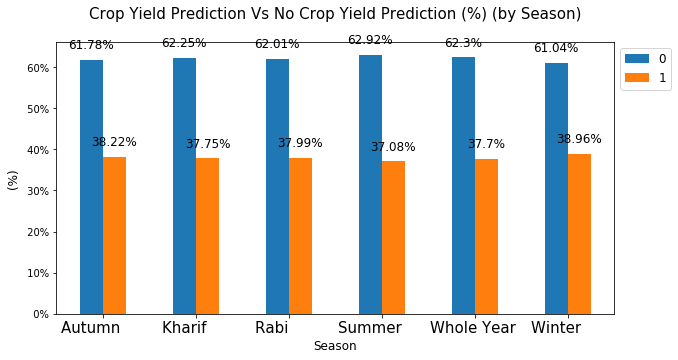

In [14]:
y_No_y_bar_plot(df, 'Season')

In [15]:

def c_No_y_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["CPPYPr"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Crop Yield Production cost Vs No Crop Yield Production cost (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group


CPPYPr,0,1
Season,,
Autumn,69.83,30.17
Kharif,69.68,30.32
Rabi,69.42,30.58
Summer,70.16,29.84
Whole Year,69.89,30.11
Winter,68.82,31.18


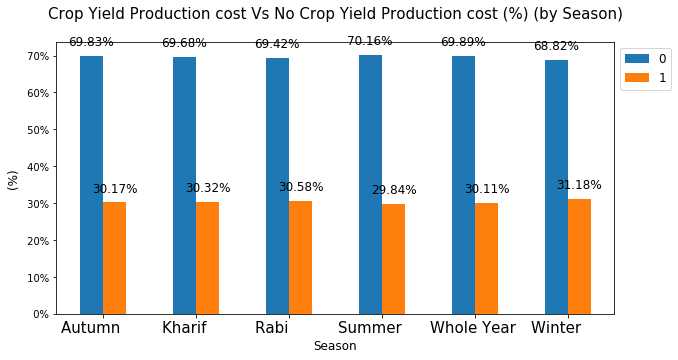

In [16]:
c_No_y_bar_plot(df, 'Season')

In [17]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'R', 'H', 'T', 'CC', 'CP', 'Y', 'CPPY', 'YPr', 'CPPYPr'],
      dtype='object')

CPPYPr,0,1
District_Name,,
ADILABAD,69.69,30.31
AGAR MALWA,50.00,50.00
AGRA,68.59,31.41
AHMADABAD,69.09,30.91
AHMEDNAGAR,68.48,31.52
AIZAWL,73.74,26.26
AJMER,70.42,29.58
AKOLA,70.70,29.30
ALAPPUZHA,70.69,29.31


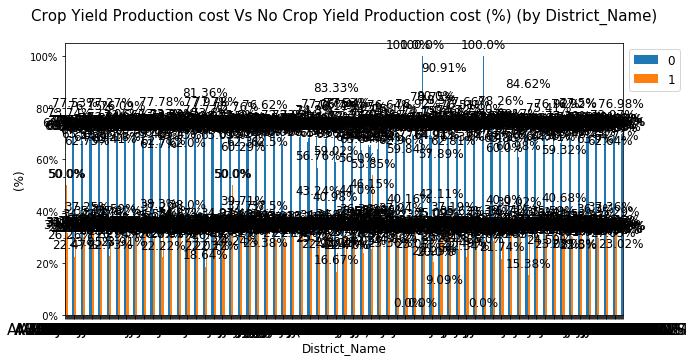

In [18]:

c_No_y_bar_plot(df, 'District_Name')

YPr,0,1
District_Name,,
ADILABAD,62.31,37.69
AGAR MALWA,46.43,53.57
AGRA,61.97,38.03
AHMADABAD,61.02,38.98
AHMEDNAGAR,61.82,38.18
AIZAWL,59.78,40.22
AJMER,63.33,36.67
AKOLA,63.10,36.90
ALAPPUZHA,62.41,37.59


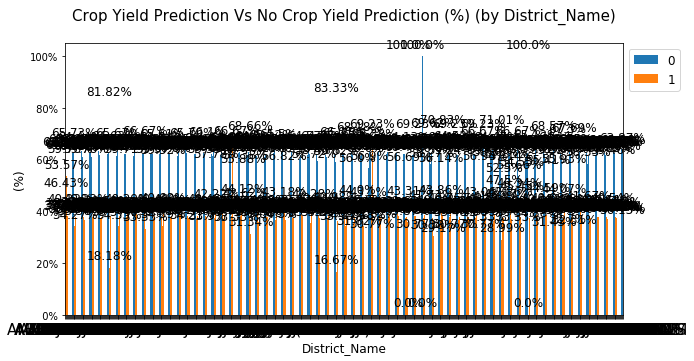

In [19]:
y_No_y_bar_plot(df, 'District_Name')